# **Analyse the Popularity of Different Programming Languages over Time**

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [37]:
df = pd.read_csv('QueryResults.csv', names= ['DATE', 'TAG', 'POSTS'], header=0 )

Display the first 5 rows and last 5 rows of the dataframe

In [38]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [39]:
df.tail()

,DATE,TAG,POSTS
2435,2023-03-01 00:00:00,php,3076
2436,2023-03-01 00:00:00,python,18203
2437,2023-03-01 00:00:00,r,4075
2438,2023-03-01 00:00:00,ruby,332
2439,2023-03-01 00:00:00,swift,1591


Check how many rows and how many columns there are or the shape of the dataframe.

In [40]:
df.shape

(2440, 3)

Count the number of entries in each column of the dataframe

In [41]:
df.count()

,0
DATE,2440
TAG,2440
POSTS,2440


The total number of post per language.

In [42]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,42486
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,394707
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1586819
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,791388
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,50734
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,68440
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1892579
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2485921
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,67606


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

Find how many months of data exist per language? Which language had the fewest months with an entry?


In [43]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,176,176
c,176,176
c#,177,177
c++,176,176
delphi,176,176
go,161,161
java,176,176
javascript,176,176
perl,176,176


## Data Cleaning

 Use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01

In [44]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [45]:
df.DATE[1]

'2008-08-01 00:00:00'

In [46]:
type(df.DATE[1])

str

In [47]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [48]:
# Convert Entire Column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation


In [49]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


Convert DataFrame each category has its own column. The easiest way to accomplish this is by using the **.pivot()** method in Pandas.

In [50]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [51]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,289.0,2183.0,6033.0,3304.0,116.0,750.0,6794.0,14353.0,110.0,3360.0,22878.0,4633.0,466.0,1674.0
2022-12-01,284.0,1863.0,5341.0,2866.0,86.0,632.0,5983.0,12553.0,95.0,2893.0,19336.0,3689.0,395.0,1469.0
2023-01-01,240.0,1515.0,5398.0,2674.0,114.0,738.0,5793.0,12283.0,75.0,3091.0,18089.0,3761.0,374.0,1448.0


Dimensions of new dataframe and the column names.

In [52]:
reshaped_df.shape

(177, 14)

In [53]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

When we count the number of entries per column we see that not all languages are the same. The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame the NaN values were inserted when there were no posts for a language in that month (e.g., Swift in July, 2008).

In [54]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


Count the number of entries per programming language that might be different.

In [55]:
reshaped_df.count()

,0
TAG,
assembly,176
c,176
c#,177
c++,176
delphi,176
go,161
java,176
javascript,176
perl,176


**Dealing with NaN Values**

In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the .fillna() method.

In [56]:
reshaped_df.fillna(0, inplace=True)

The inplace argument means that we are updating reshaped_df.

Without inplace argument

In [57]:
reshaped_df = reshaped_df.fillna(0)

In [58]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1642.0,754.0,104.0,0.0,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,141.0,0.0,956.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0


**Look for NaN values in the dataframe:**

Here using the .isna() method, also  the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

In [59]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


Using the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

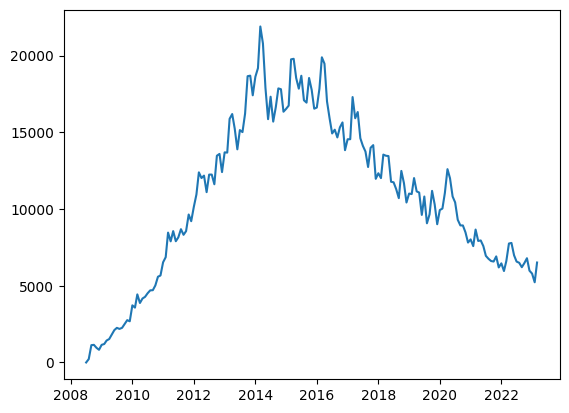

In [60]:
plt.plot(reshaped_df.index, reshaped_df.java)

Square bracket notation.

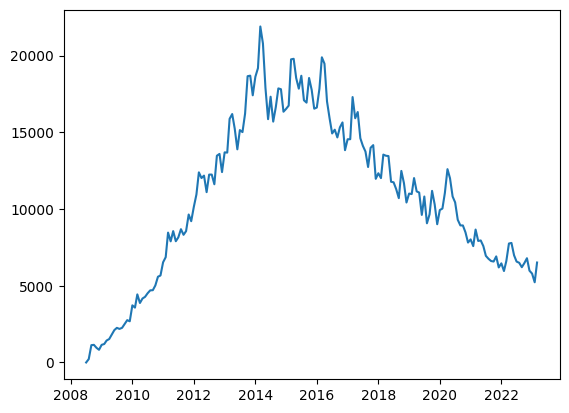

In [61]:
plt.plot(reshaped_df.index, reshaped_df['java'])

**Styling the Chart**

Let's look at a couple of methods that will help us style our chart:

To make chart size increase

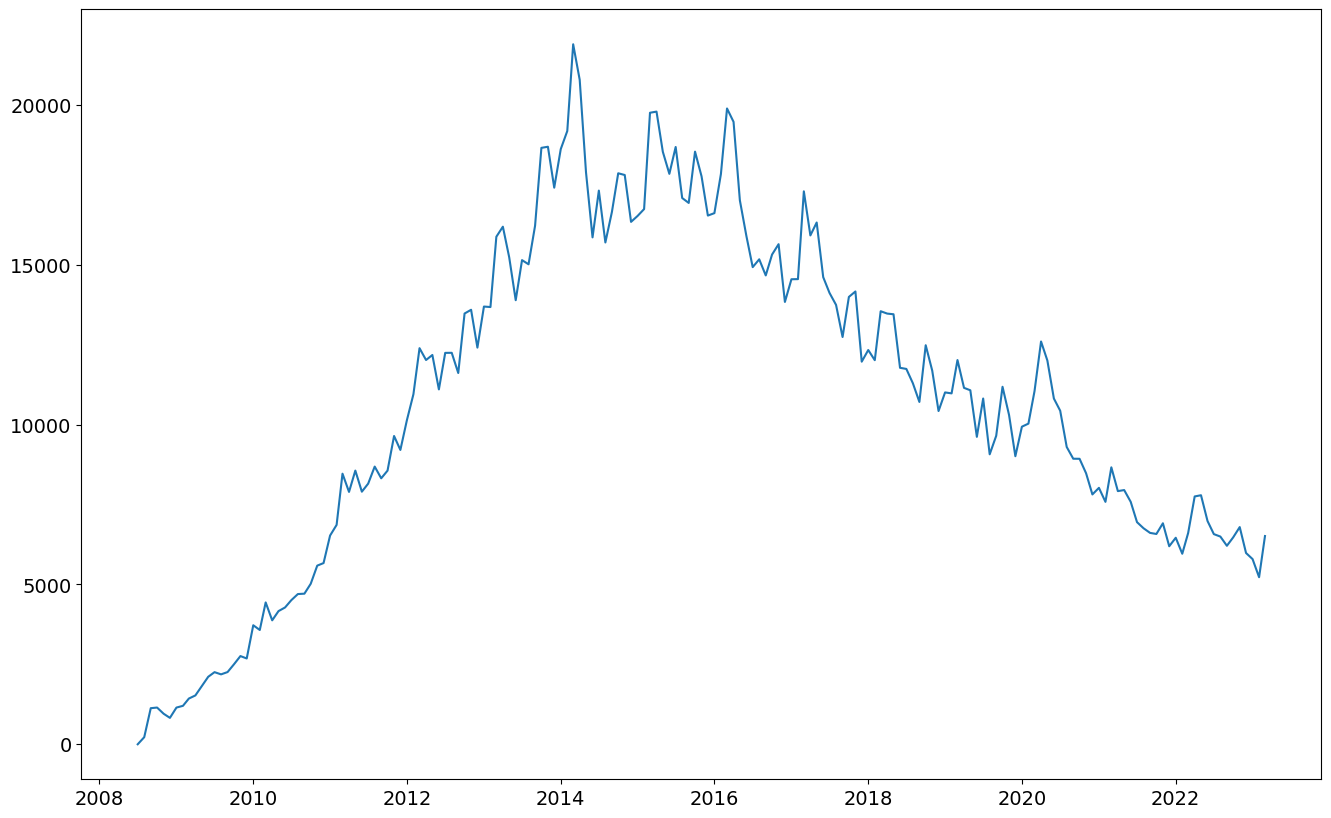

In [62]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

Add labels and set a lower limit of 0 for the y-axis with .ylim().

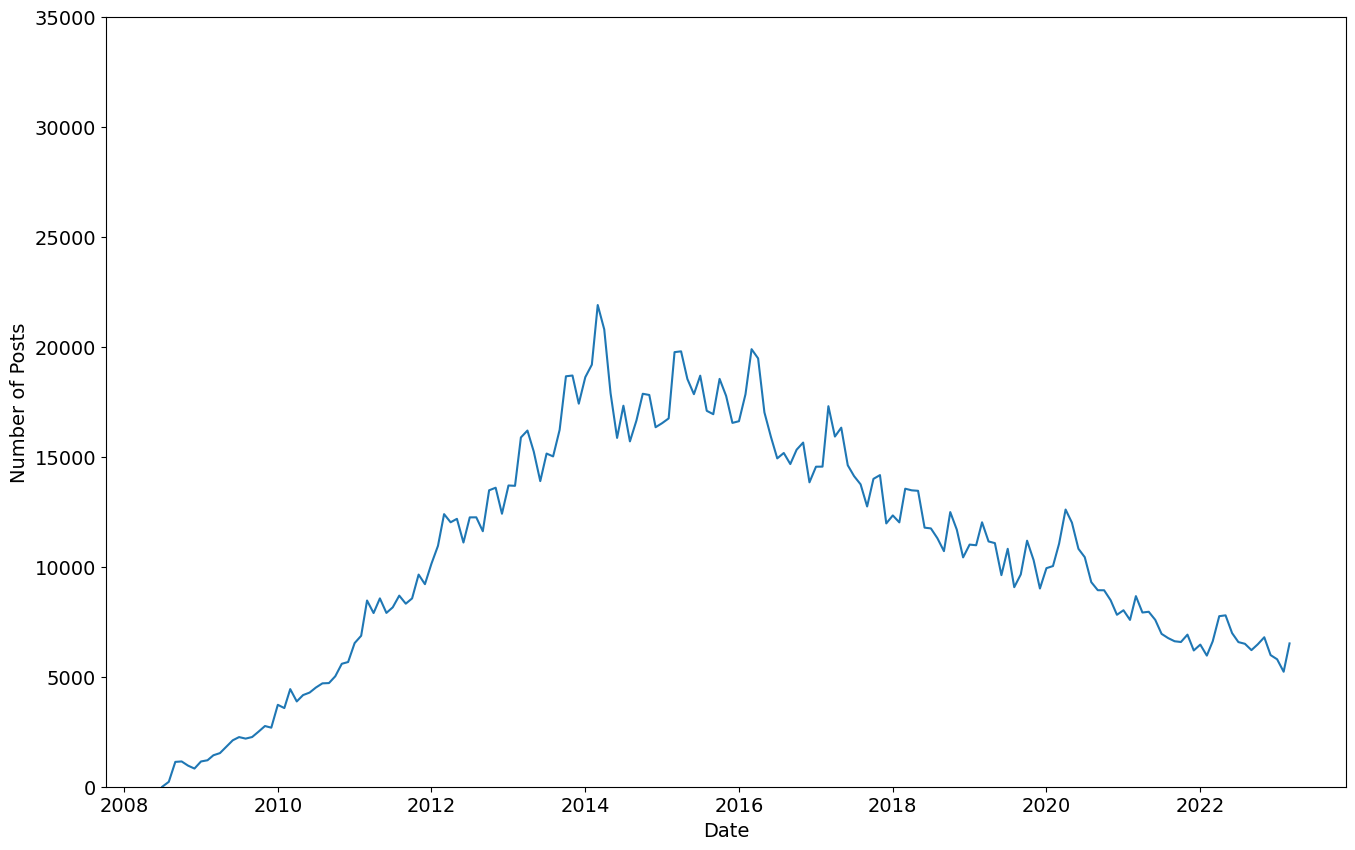

In [63]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

Python and  Java on the same chart.

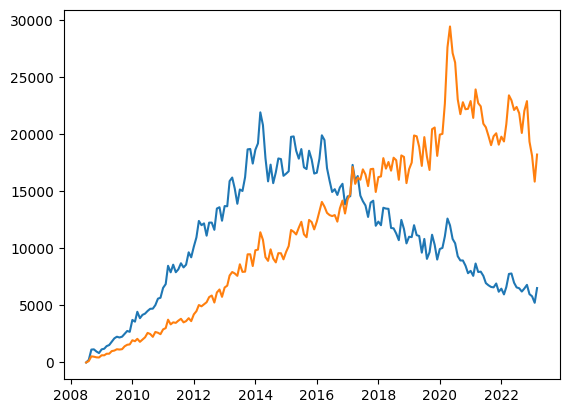

In [64]:
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

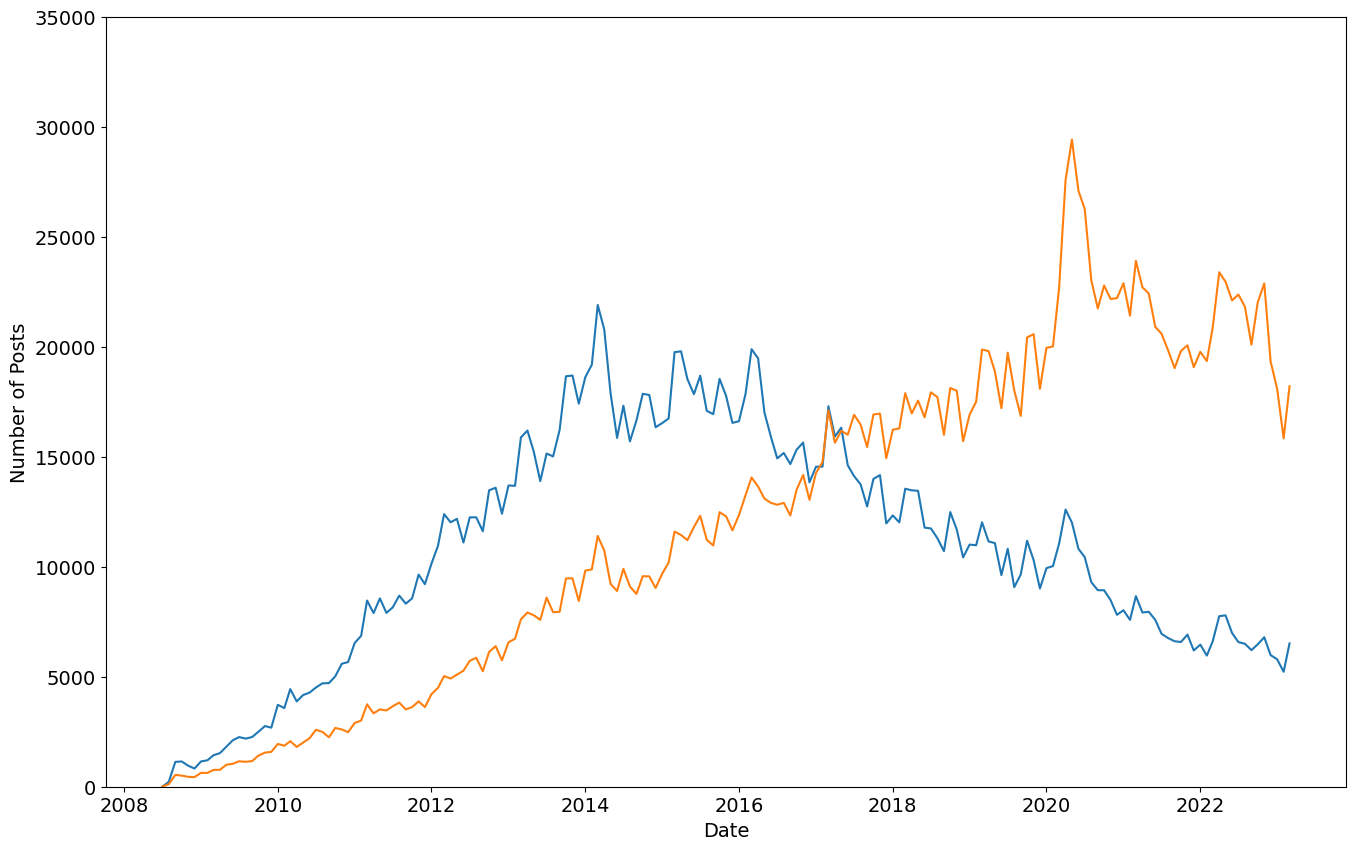

In [65]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

All the programming languages on the same chart

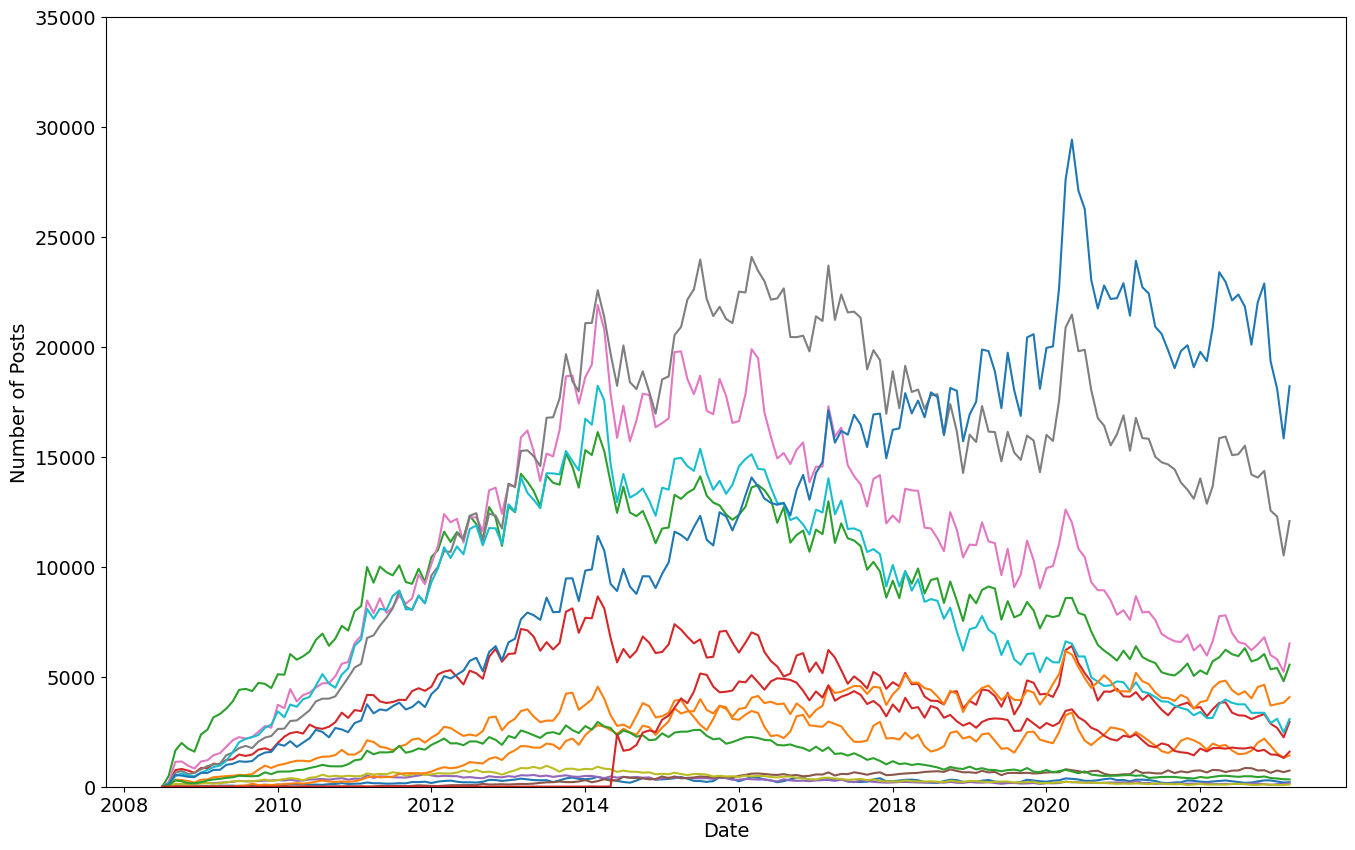

In [66]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

Add labels and legend to chart

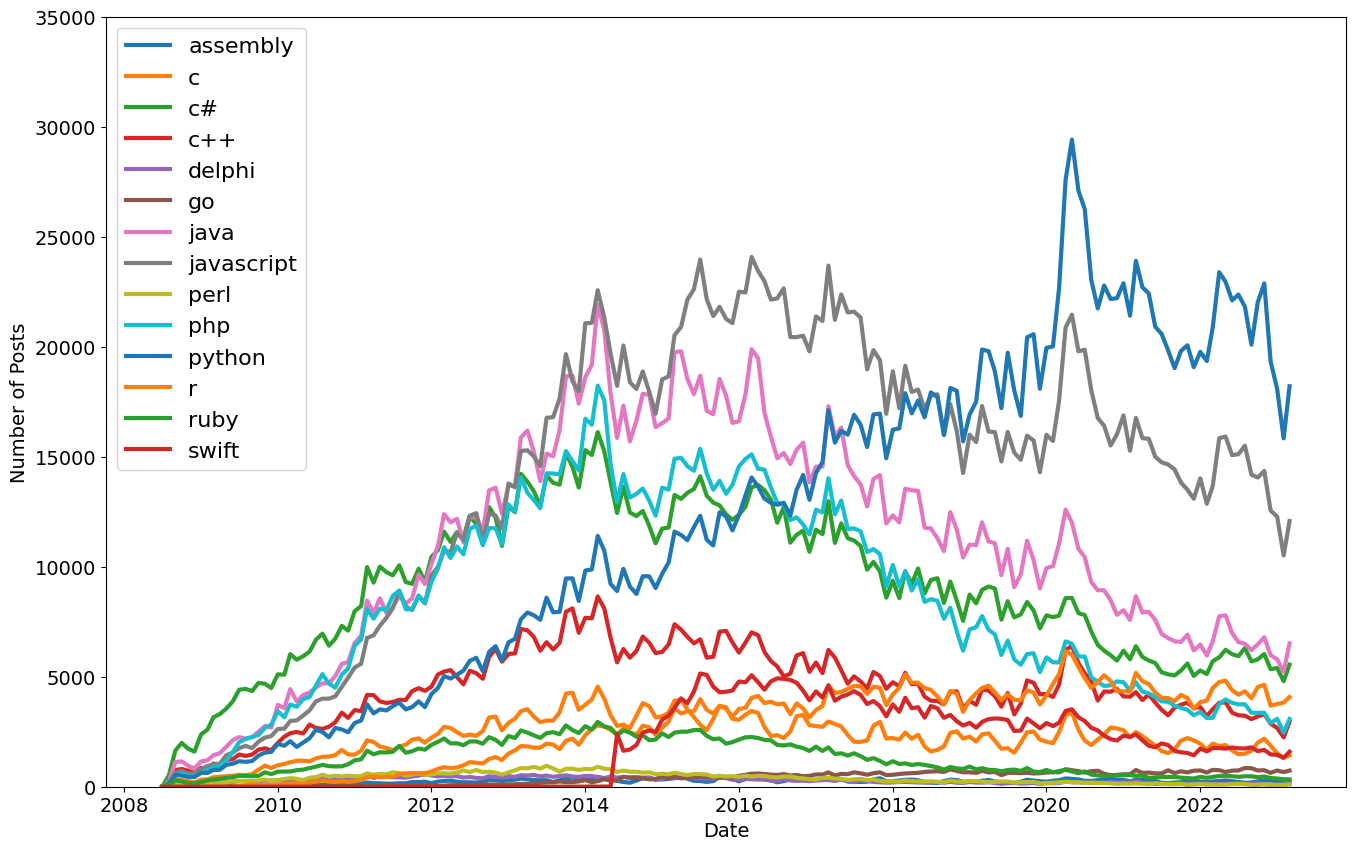

In [67]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win!

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

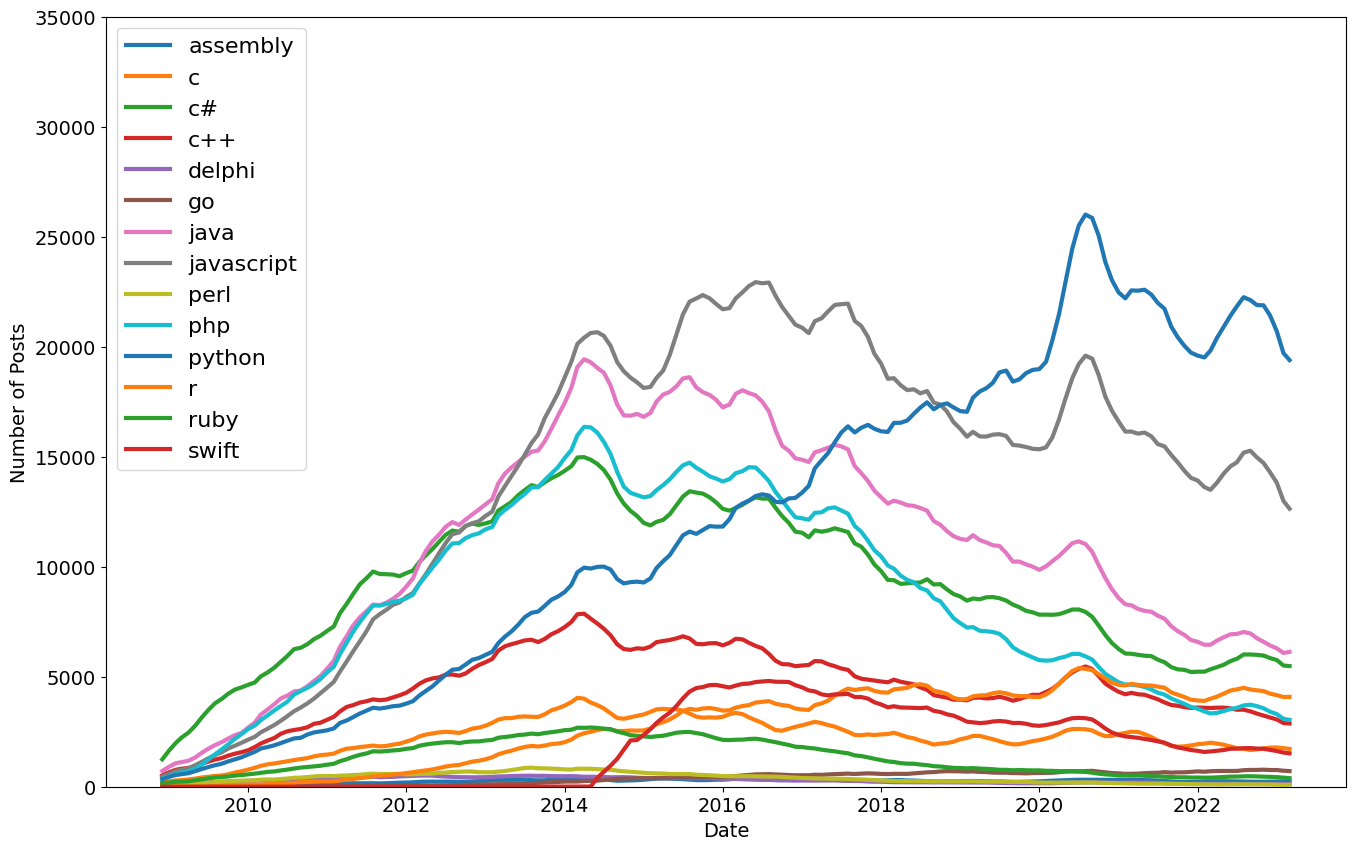

In [68]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(reshaped_df.index, roll_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

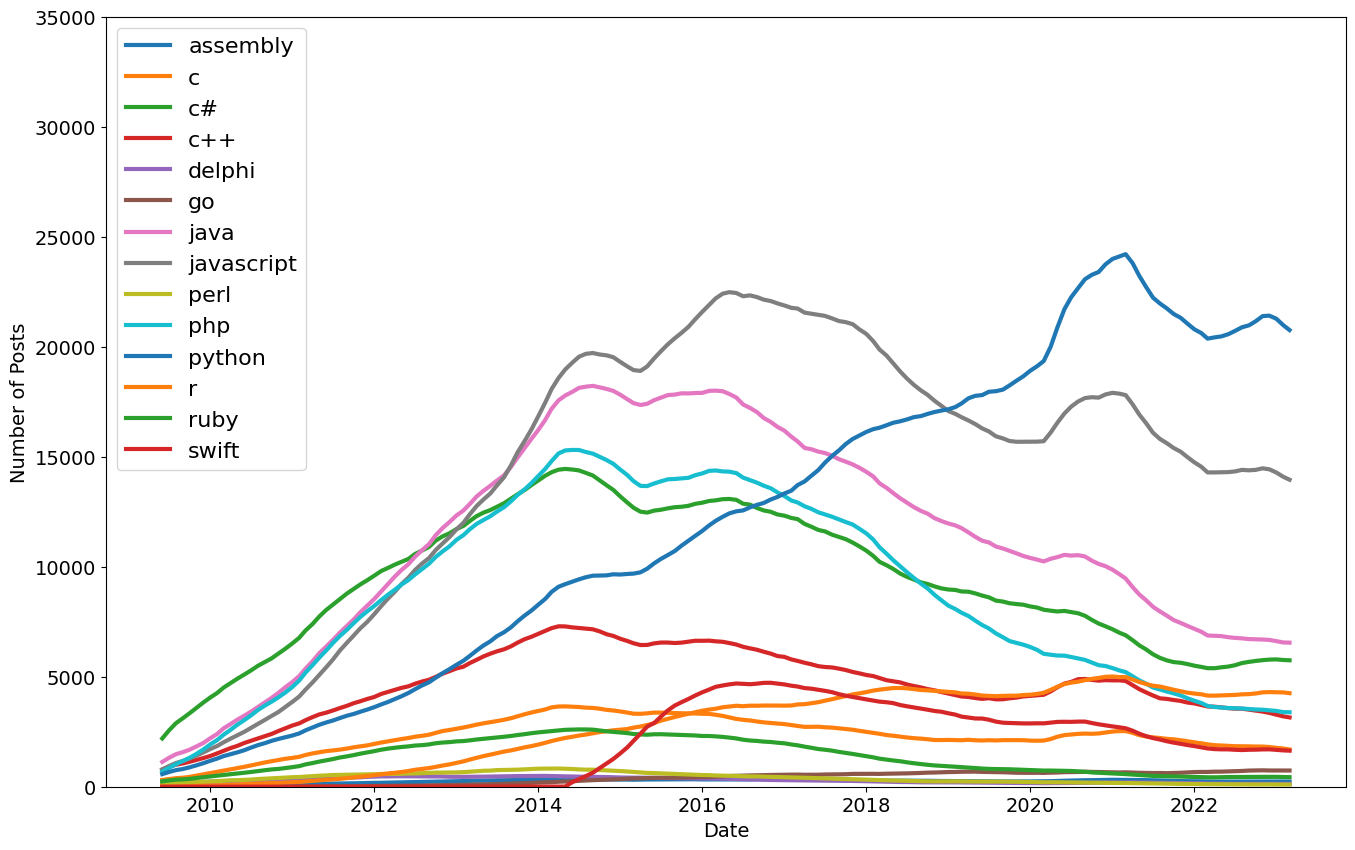

In [69]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(reshaped_df.index, roll_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

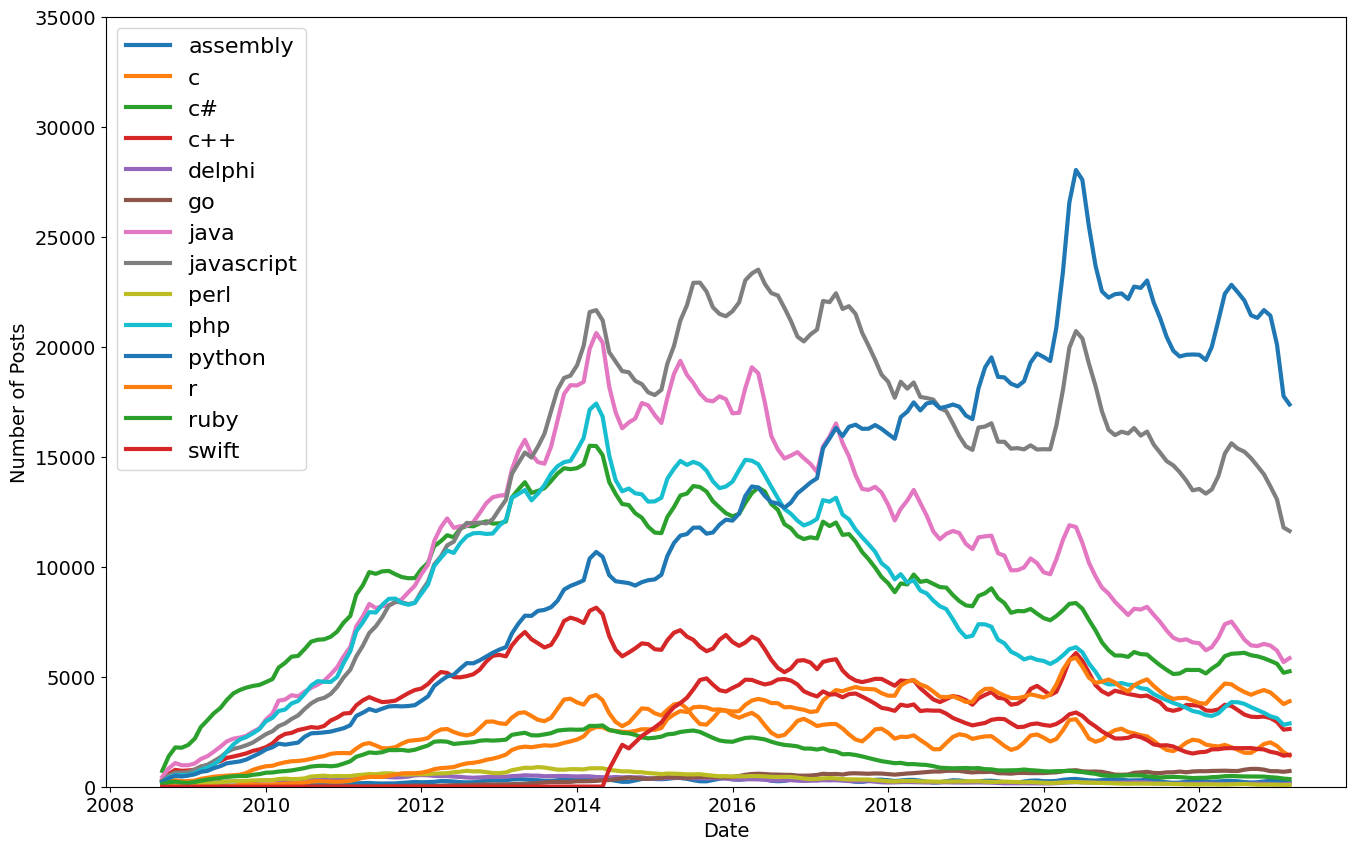

In [70]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(reshaped_df.index, roll_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)